In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(126)

# Random Samples

We call a set of random variables ${Z_{i}}_{i=1}^{n},\,Z\in\mathbb{R^{k}}$ a _cross-sectional random sample of sample size n_ if we have that $Z_{i}$ and $Z_{j}$ are independent for all $i$ and $j$.

Often in econometrics we partition the observed random $Z$ into the _endogenous_ (outcome) variable $Y \in \mathbb{R}$ and the _exogenous_ (input) variables $X \in \mathbb{R^{k}}$. Of course we allow the random pair $(Y_{i},X_{i})$ to have correlated components, but in the cross-sectional random sample framework the pair is uncorrelated with other pairs.

To make more progress, we make one additional assumption on $Z_{1},Z_{2},$ etc. We assume the observations  ${(Y_{i},X_{i})}_{i=1}^{n}$ are identically distributed; that is, they are draws from a common distribution $F$. (B. Hansen Assumption 3.2.1) This is an assumption for now but is in theory empirically testable, but partof applied work is decided when the common distribution assumption is reasonable.

We write the _realized_ sample as ${(y_{i}, x_{i})}_{i=1}^{n}$, which is just a set of numbers that are realizations of $F$.

Generate a random sample of $(y_{i}, x_{i})$ pairs that have correlated components but are independent across observations:

In [2]:
n = 500
x = np.random.random(size=(n,3))
y = 3 * x[:,0] + 2 * x[:,1]**2 + 0 * x[:,2] - np.random.normal(size=(n))

<IPython.core.display.Javascript object>


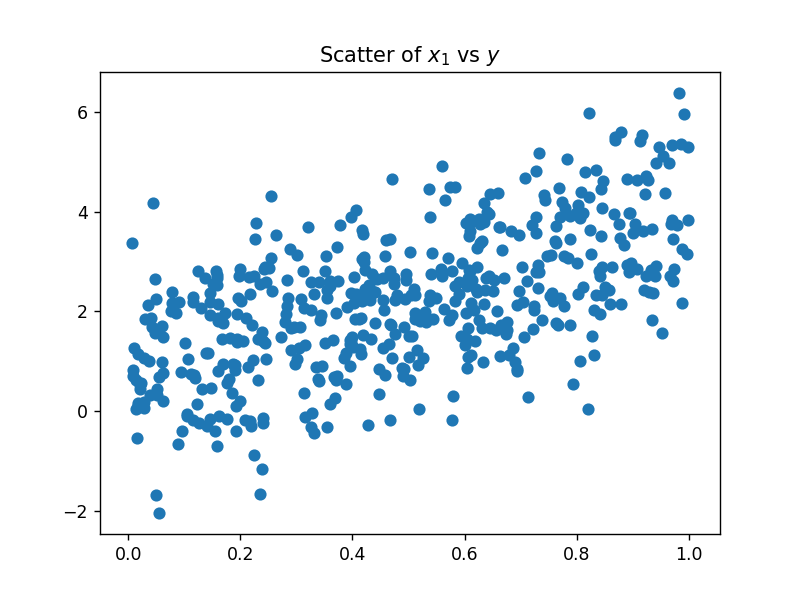

<IPython.core.display.Javascript object>


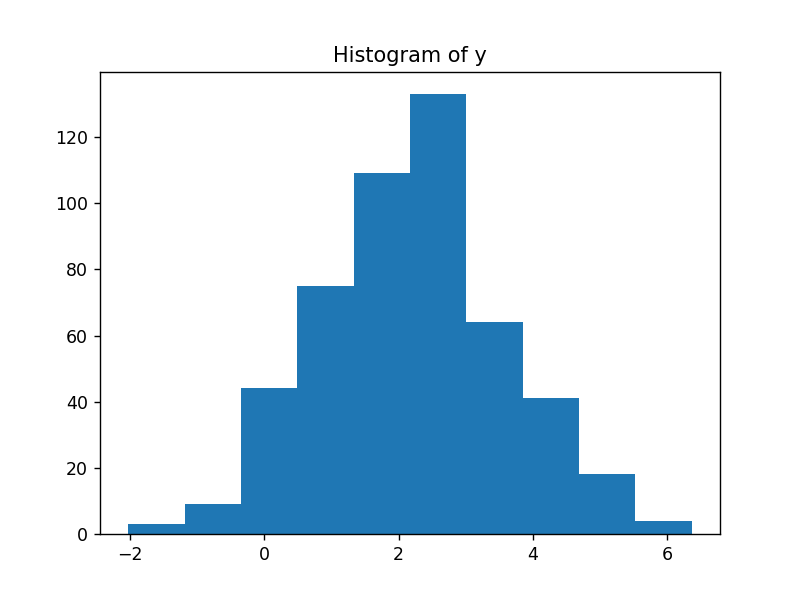

In [3]:
plt.figure()
plt.scatter(x[:,0], y)
plt.title('Scatter of $x_1$ vs $y$')
plt.figure()
plt.hist(y)
plt.title('Histogram of y')

Much advanced work in econometrics analyzes cases that violate the independence or identical distribution assumptions.

### The Distribution of a Cross-Sectional Random Sample

If $Z\equiv(Z_{1},Z_{2},...,Z_{n})$ is a random sample, we can write the joint CDF of $Z$ using the property of multiplying CDFs:

$F(Z\leq z) = F(Z_{1}\leq z_{1})\cdot F(Z_{2}\leq z_{2}) \cdot ... \cdot F(Z_{n}\leq z_{n}),\,z\in\mathbb{R^n}$

By taking all the partial derivatives, we see that we can also write the pdf (if it exists) as


$f(z) = f(z_{1}) f(z_{2}) ... f(z_{n}) = \prod_{i} \, f(z_i)$

#### Joint pmf/pdfs of random samples:

$Z$ Bernoulli: ?

$Z$ Standard Normal: ?

$Z$ Exponential($\lambda$): ?

# Sample Statistics

We call a function $\theta({{(y_{i}, x_{i})}_{i=1}^{n}})$ whose only arguments are a realized sample a _sample statistic_. We can also consider $\theta({{(Y_{i}, X_{i})}_{i=1}^{n}})$, a random variable whose realizations are different values of the sample statistic. Below, let $\cdot$ denote an observed sample.

Some examples:

$\theta(\cdot) = \frac{1}{n}\sum_{i=1}^{n} x_{i} \equiv \bar x$, the sample mean.

In [4]:
1/n * np.sum(x, 0)

array([ 0.48881921,  0.50291945,  0.50537055])

$\theta(\cdot) = \frac{1}{n}\sum_{i=1}^{n} (x_{i} - \bar x)^2 \equiv \hat{\sigma}_{x}^2$, the sample variance.

In [5]:
1/n * np.sum((x - x.mean(0))**2, 0)

array([ 0.07702736,  0.08814895,  0.08420824])

$\theta(\cdot) = \frac{1}{n}\sum_{i=1}^{n} (x_{i}^{(m)} - \bar{x^{(m)}})\times(y_{i} - \bar y) \equiv \hat{\sigma}_{x^{(m)},y}$, the sample covariance of component $m$ of $X$ and $Y$.

Any transformation of a sample statistic is still a sample statistic, e.g. the sample standard deviation $\hat{\sigma} = \sqrt{\hat{\sigma}_{x}^2} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (x_{i} - \bar x)^2}$

## The Distribution of Sample Statistics

If we know $f(z)$, in theory it is possible to calcuate the distribution of any sample statistic.

The sample mean is the sample statistics $\bar x = \frac{1}{n}\sum_{i=1}^{n} x_{i}$. 

Let's try to calculate the sampling distribution of $\bar x({X_{1}, X_{2}})$, the mean with two observations.

$\Pr\left(\bar{X}\leq z\right)=\Pr\left(\frac{X_{1}+X_{2}}{2}\leq z\right)=\Pr\left(X_{2}\leq2z-X_{1}\right)=\intop_{-\infty}^{\infty}\intop_{-\infty}^{2z-X_{1}}f\left(x_{1}\right)f\left(x_{2}\right)dx_{2}dx_{1}$

$=\intop_{-\infty}^{\infty}f\left(x_{1}\right)F\left(2z-x_{1}\right)dx_{1}$ and so the pdf is

$f\left(z\right)=\frac{\partial\Pr\left(\bar{X}\leq z\right)}{\partial z}=2\intop_{-\infty}^{\infty}f\left(x_{1}\right)f\left(2z-x_{1}\right)dx_{1}$.

Needless to say, this approach does not tell us that much about the actual distribution of the mean except in particular cases, nor does it generalize well to more than 2 random variables.

Three cases we can solve in closed form (Goldberger pg. 83):
1. If $X\sim$ Bernoulli($p$), then $\sum_{i=1}^{n} x_{i} \sim$ Binomial($n,p$)
2. If $X\sim$ Normal($\mu, \sigma$), then $\bar X \sim$ N$(\mu, \frac{\sigma^2}{n})$
3. If $X\sim$ Exponential$(\lambda)$, then $W\sim \chi^2(k)$, where $k=2n$ and $W=k\lambda\bar{X}$

### The Distribution of Sample Statistics: Simulation Evidence

With modern simulation tools, simulating sample statistics is effectively as easy as simulating from the underlying distribution itself even for very complicated sample statistics. For example, let's simulate $M$ draws from the sample statistic 

$\theta(\cdot) = \min\{X_1, X_2, X_3, ..., X_N\}$ with $X\sim$ Logistic.

<IPython.core.display.Javascript object>


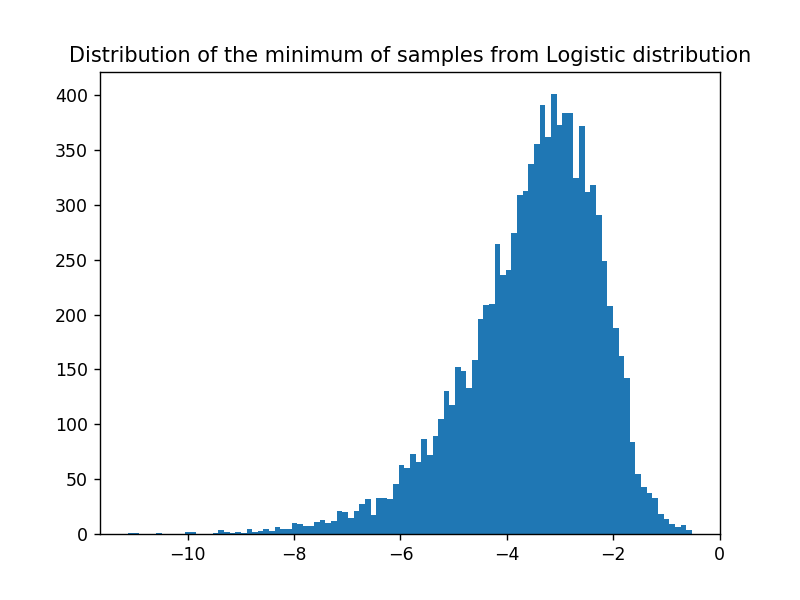

In [6]:
nsimulations = 10000
nobservations = 20
theta = np.zeros(nsimulations)
for i in range(0, nsimulations):
    np.random.seed(1928 + i)
    sample = np.random.logistic(size=nobservations)
    theta[i] = np.min(sample)
plt.figure()
plt.hist(theta, bins=int(nsimulations/100))
plt.title('Distribution of the minimum of samples from Logistic distribution')
plt.show()

Now let's simulate $M$ draws from the sample mean, for 20 observations, of a Bernoulli$(p)$:


<IPython.core.display.Javascript object>


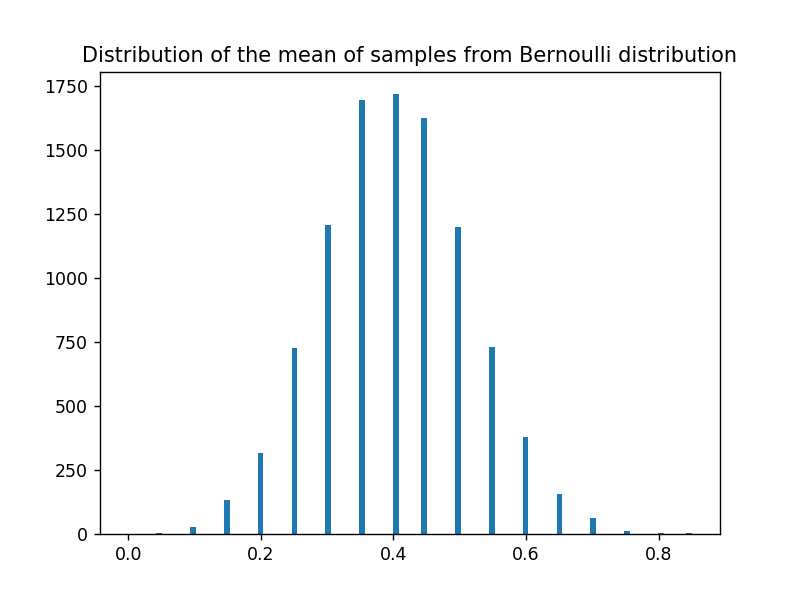

In [7]:
nsimulations = 10000
nobservations = 20
theta = np.zeros(nsimulations)
for i in range(0, nsimulations):
    np.random.seed(1928 + i)
    sample = np.random.binomial(1,.4, size=nobservations)
    theta[i] = np.mean(sample)
plt.figure()
plt.hist(theta, bins=int(nsimulations/100))
plt.title('Distribution of the mean of samples from Bernoulli distribution')
plt.show()

Notice there are two parameters we use here: the size of the data set and the number of simulations. Sometimes a sample statistic is notated $\theta_{n}$ to emphasize how it depends on the sample size.

### Sample Moments

Luckily, the linearity of expectations and linearity of variances (with independence) makes us able to make some general statements about sample statistics in easy cases.

1. $E[\bar{X}] = E[X_{i}]$
2. $V(\bar{X}) = \frac{V(X_{i})}{n}$

Derivations:

1. $E[\bar{X}]=E\left[\frac{1}{n}\sum_{i=1}^{n}X_{i}\right]=\frac{1}{n}\sum_{i=1}^{N}E\left[X_{i}\right]=E\left[X_{i}\right]$
2. $V\left(\bar{X}\right)=V\left(\frac{1}{n}\sum_{i=1}^{n}X_{i}\right)=\frac{1}{n^{2}}V\left(\sum_{i=1}^{n}X_{i}\right)=\frac{1}{n^{2}}\sum_{i=1}^{n}V\left(X_{i}\right)=\frac{V\left(X_{i}\right)}{n}$

We only used independence across $X_{i}$ in part 2, used so that the variance would pass through the sum with no covariance terms.

We can see how these work with simulations, taking $X$ to be Exponential$(\lambda)$, which we know has mean of $\lambda^{-1}$ and variance of $\lambda^{-2}$.

<IPython.core.display.Javascript object>


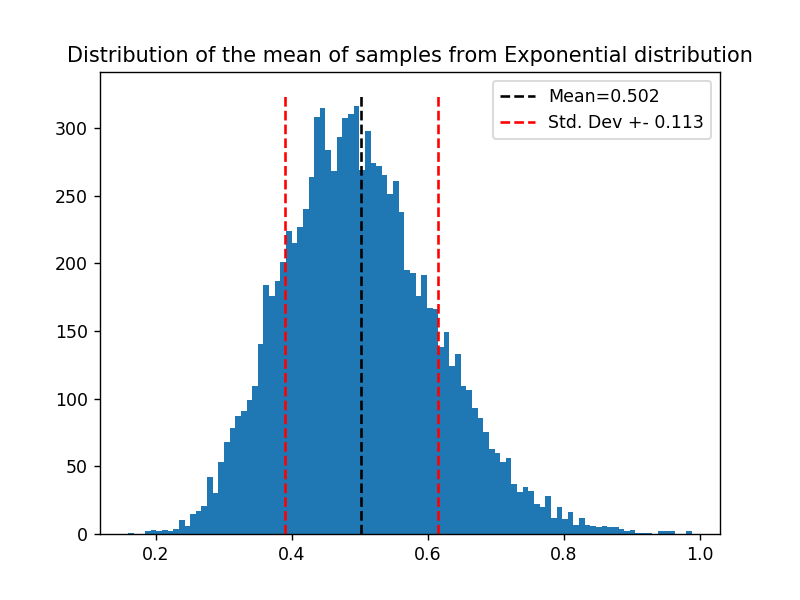

Expected mean: 0.5
Expected std: 0.111803398875


In [38]:
nsimulations = 10000
nobservations = 20
lam = 2.0
theta = np.zeros(nsimulations)
for i in range(0, nsimulations):
    np.random.seed(1928 + i)
    sample = np.random.exponential(1/lam, size=nobservations) # numpy uses 1/lambda!
    theta[i] = np.mean(sample)
plt.figure()
plt.hist(theta, bins=int(nsimulations/100))
plt.title('Distribution of the mean of samples from Exponential distribution')
plt.plot([theta.mean(), theta.mean()], [0.0, 325], 'k--', label='Mean={}'.format(round(theta.mean(),3)))
plt.plot([theta.mean() + theta.std(), theta.mean() + theta.std()], 
         [0.0, 325], 'r--', 
         label='Std. Dev +- {}'.format(round((theta.std()),3)))
plt.plot([theta.mean() - theta.std(), theta.mean() - theta.std()], 
         [0.0, 325], 'r--')
plt.legend()
plt.show()
print('Expected mean:', 1/lam)
print('Expected std:', np.sqrt(1/lam**2/nobservations))